<a href="https://colab.research.google.com/github/cuentadesanti/RealEstate/blob/main/DD360TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reto obligatorio

In [ ]:
pip install nl2query

In [4]:
from nl2query import PandasQuery
import pandas as pd

In [5]:
#cargar csv
listings = pd.read_csv('/content/sample_data/listings.csv')

In [91]:
#entrenar nlp2query
queryfier = PandasQuery(listings, 'listings')

In [87]:
queryfier.generate_query("What is the average price of apartments with pool?", top_p = 1)

"listings2.loc[listings2['has_pool']=='1', 'last_price'].mean()"

In [88]:
exec("ans="+queryfier.generate_query("What is the average price of apartments with pool?"))
print(ans)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


nan


In [45]:
queryfier.generate_query("What is the average price of apartments with pool?", top_p = 1)

"listings.loc[listings['has_pool']=='1', 'last_price'].mean()"

In [125]:
#fixing pool and terrace
def clean_query(prompt):
    qstr = queryfier.generate_query(prompt, top_p = 1)

    if "'has_pool'" in qstr or "'has_terrace'" in qstr:

        for i in ["'no'", "'NO'", "'n'", "'N'", "'0'","'True'","'T'","'t'","'TRUE'"]:
            qstr = qstr.replace(i, "0")
        for i in ["'yes'", "'YES'", "'y'", "'Y'", "'1'","'False'","'F'","'f'","'FALSE'"]:
            qstr = qstr.replace(i, "1")
    if "'sale'" in qstr: qstr = qstr.replace("'sale'","'for-sale'")
    elif "'rent'" in qstr: qstr = qstr.replace("'rent'","'for-rent'")

    return qstr


In [116]:
cq = clean_query("What is the average price of apartments with pool?")
exec("ans="+cq)
ans

5057512.241413626

Debraye para apartment v house


In [95]:
#cargar csv
listings2 = pd.read_csv('/content/sample_data/listings2.csv')

In [96]:
#entrenar nlp2query
queryfier2 = PandasQuery(listings2, 'listings2')

In [99]:
queryfier2.generate_query("What is the average price of listings that is apartment with pool?", top_p = 1)

"listings2.loc[listings2['has_apartment'] == '1', 'last_price'].mean()"

In [120]:
#fixing ap, ho, pool and terrace
def clean_query2(prompt):
    qstr = queryfier.generate_query(prompt, top_p = 1)

    if "'has_pool'" in qstr or "'has_terrace'" in qstr:

        for i in ["'no'", "'NO'", "'n'", "'N'", "'0'","'True'","'T'","'t'","'TRUE'"]:
            qstr = qstr.replace(i, "0")
        for i in ["'yes'", "'YES'", "'y'", "'Y'", "'1'","'False'","'F'","'f'","'FALSE'"]:
            qstr = qstr.replace(i, "1")
    if "'sale'" in qstr: qstr = qstr.replace("'sale'","'for-sale'")
    elif "'rent'" in qstr: qstr = qstr.replace("'rent'","'for-rent'")

    return qstr


Traductor

In [ ]:
pip install translate

In [101]:
from translate import Translator

In [109]:
translator= Translator(from_lang="es",to_lang="en")
translation = translator.translate("Pluma.")

In [110]:
translation

'Feather.'

In [112]:
quest = translator.translate("¿Cuál es el precio promedio de los departamentos en venta?")
quest

'What is the average price of apartments for sale?'

In [121]:
queryfier.generate_query(quest)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


"listings.loc[lambda x: x['property_type']=='sale', 'last_price'].mean()"

In [126]:
clean_query(quest)

"listings.loc[lambda x: x['property_type']=='for-sale', 'last_price'].mean()"

In [128]:
cq = clean_query(quest)
exec("ans="+cq.replace("'property_type'","'listing_type'"))
ans

7884095.444837818

Reto opcional:

●	Como un científico de datos, tu misión es predecir el tiempo que una propiedad está en el mercado. Establece la métrica con la que vas a evaluar dicha predicción. ¿Cómo se ve tu análisis para las propiedades que aún no se venden contra las que ya se vendieron?

○	Nota: El tiempo que una propiedad está en el mercado está en la columna time2event, el cual está medido en días, y si se vendió o no la propiedad está en event, marcado con 1 o 0, respectivamente.

○	El archivo se llama liquidity_challenge


In [133]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 9.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=2102641d3cea0a3be2cfd647e643b8e652cbad2c978015dc840aabce14ef3bff
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [151]:
from lifelines import CoxPHFitter, KaplanMeierFitter
import pandas as pd

# Load your data
data = pd.read_csv("/content/sample_data/liquidity_challenge.csv")

# Preprocess the data
data = data.dropna()
data_encoded = pd.get_dummies(data[['time2event','event','surface_total','views','property_type']], columns=['property_type'], drop_first=True)

# Fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(data_encoded, duration_col='time2event', event_col='event')

# Display the model summary
print(cph.summary)

                         coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                            
surface_total       -0.000881   0.999120  0.000197       -0.001266   
views                0.001575   1.001576  0.001029       -0.000442   
property_type_house  0.202860   1.224900  0.059837        0.085581   

                     coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  \
covariate                                                                       
surface_total             -0.000495             0.998735             0.999505   
views                      0.003592             0.999558             1.003598   
property_type_house        0.320138             1.089350             1.377318   

                     cmp to         z         p   -log2(p)  
covariate                                                   
surface_total           0.0 -4.480206  0.000007  17.032953  
views                   0.0  1.530394  0.125919   2.989428  

In [150]:
CoxPHFitter.check_assumptions(cph,training_df=data_encoded,advice=True)

Proportional hazard assumption looks okay.


[]

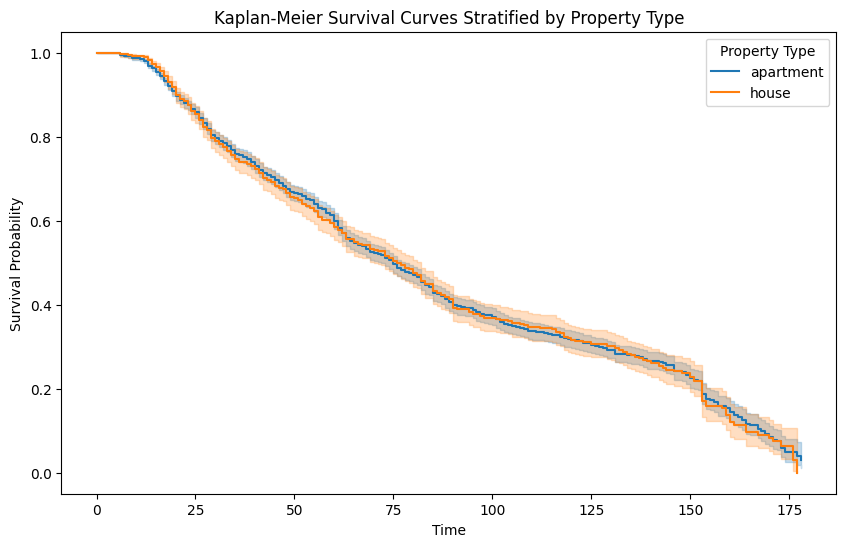

In [154]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Assuming 'data' is your DataFrame, including a 'property_type' column

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for property_type in data['property_type'].unique():
    # Select data for each property type
    idx = data['property_type'] == property_type
    kmf.fit(data[idx]['time2event'], event_observed=data[idx]['event'], label=property_type)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves Stratified by Property Type')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Property Type')
plt.show()


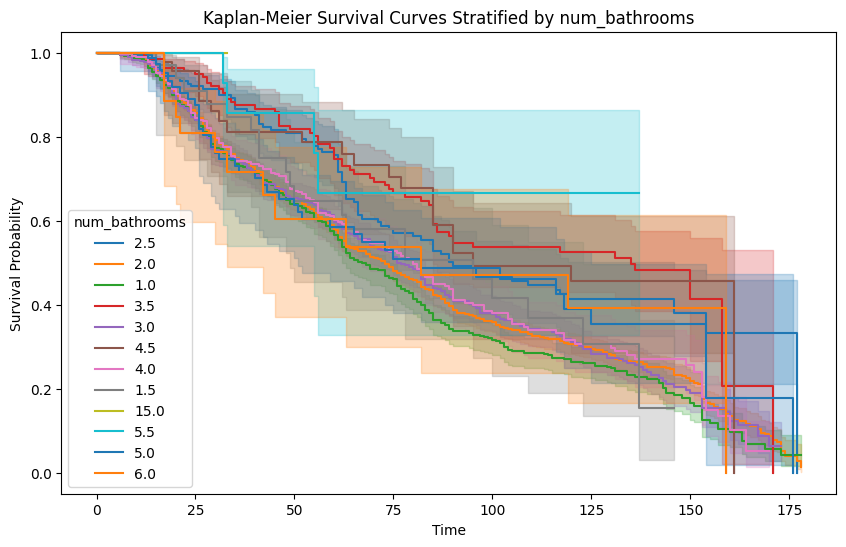

In [155]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for property_type in data['num_bathrooms'].unique():
    # Select data for each property type
    idx = data['num_bathrooms'] == property_type
    kmf.fit(data[idx]['time2event'], event_observed=data[idx]['event'], label=property_type)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves Stratified by num_bathrooms')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='num_bathrooms')
plt.show()

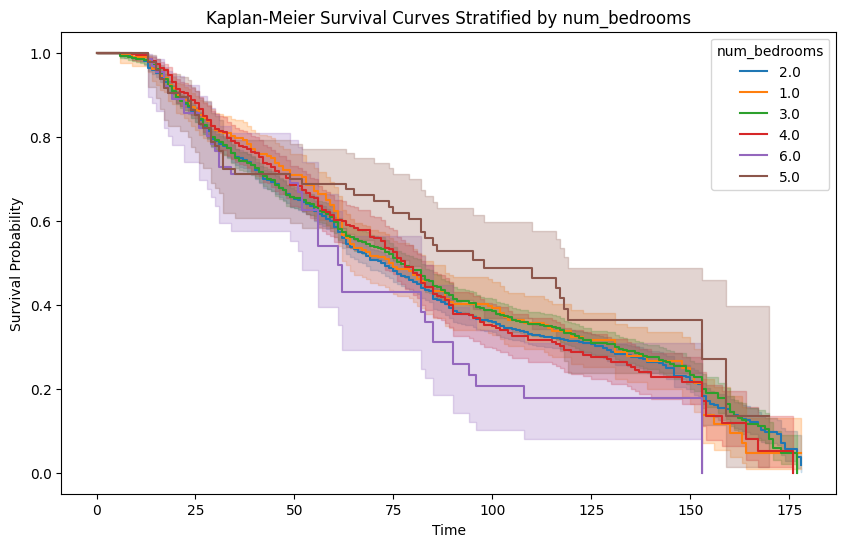

In [156]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for property_type in data['num_bedrooms'].unique():
    # Select data for each property type
    idx = data['num_bedrooms'] == property_type
    kmf.fit(data[idx]['time2event'], event_observed=data[idx]['event'], label=property_type)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves Stratified by num_bedrooms')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='num_bedrooms')
plt.show()


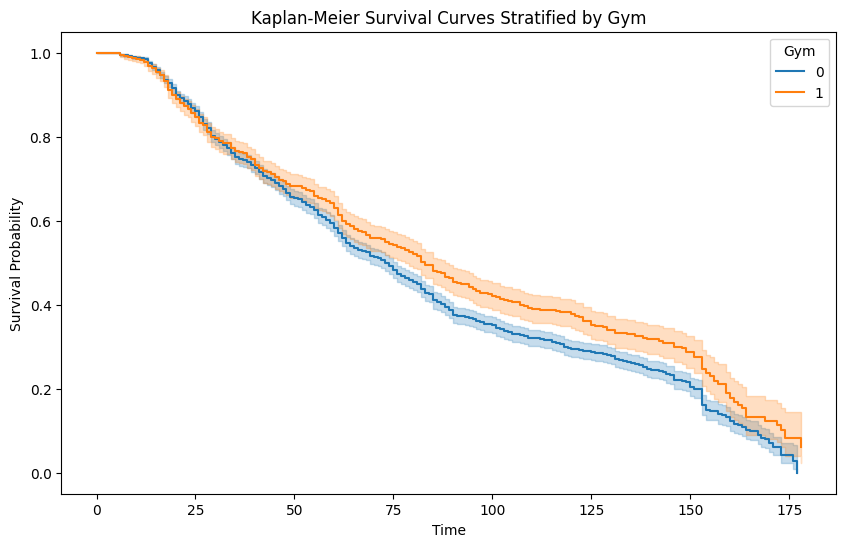

In [158]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for has_gym in data['has_gym'].unique():
    # Select data for each property type
    idx = data['has_gym'] == has_gym
    kmf.fit(data[idx]['time2event'], event_observed=data[idx]['event'], label=has_gym)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves Stratified by Gym')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Gym')
plt.show()

In [173]:
df = data
# Calculate the percentiles
percentiles = df['last_price'].quantile([0.25, 0.5, 0.75])

# Function to map percentiles to values 1, 2, 3, or 4
def map_percentile_to_value(last_price):
    if last_price <= percentiles[0.25]:
        return 1
    elif last_price <= percentiles[0.5]:
        return 2
    elif last_price <= percentiles[0.75]:
        return 3
    else:
        return 4

# Add a new column "percentile_column"
df['percentile_column'] = df['last_price'].apply(map_percentile_to_value)

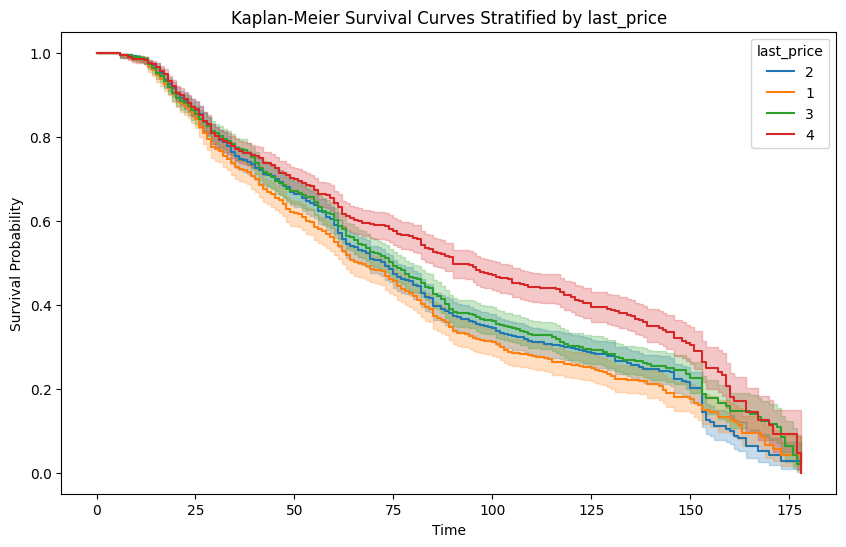

In [174]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for percentile_column in df['percentile_column'].unique():
    # Select df for each property type
    idx = df['percentile_column'] == percentile_column
    kmf.fit(df[idx]['time2event'], event_observed=df[idx]['event'], label=percentile_column)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves Stratified by last_price')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='last_price')
plt.show()

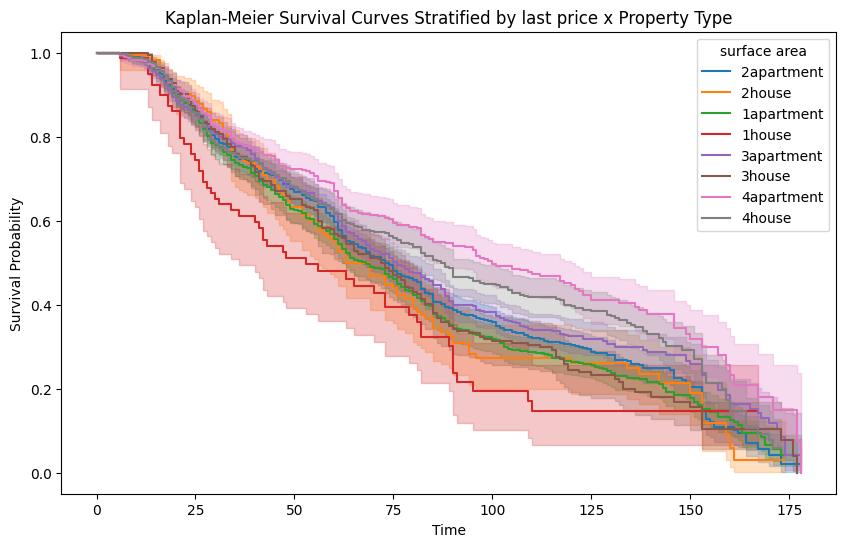

In [175]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for percentile_column in df['percentile_column'].unique():
    for typex in df['property_type'].unique():
        # Select df for each property type
        idx = (df['percentile_column'] == percentile_column) & (df['property_type'] == typex)
        kmf.fit(df[idx]['time2event'], event_observed=df[idx]['event'], label=str(percentile_column)+str(typex))
        kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves Stratified by last price x Property Type')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='surface area')
plt.show()

In [176]:
df = data
# Calculate the percentiles
percentiles = df['last_price'].quantile([0.5])

# Function to map percentiles to values 1, 2, 3, or 4
def map_percentile_to_value(last_price):
    if last_price <= percentiles[0.5]:
        return 1
    else:
        return 2

# Add a new column "percentile_column"
df['percentile_column'] = df['last_price'].apply(map_percentile_to_value)

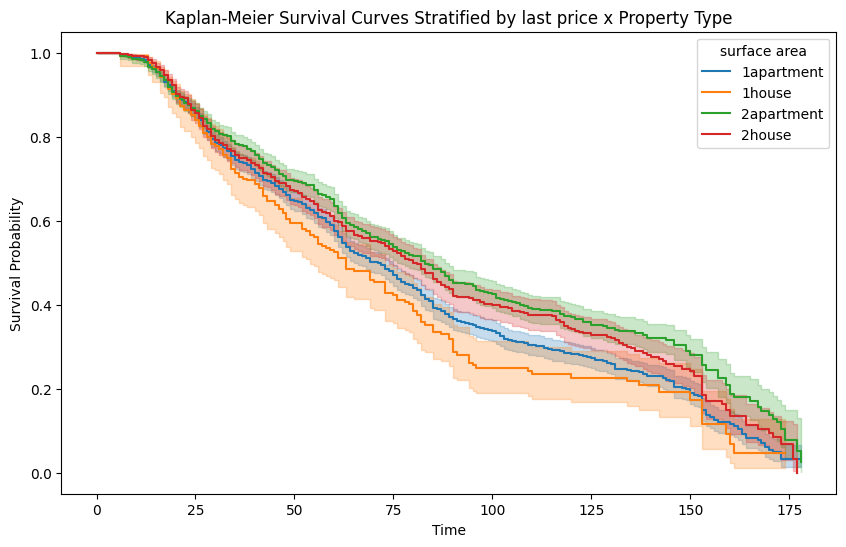

In [177]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for percentile_column in df['percentile_column'].unique():
    for typex in df['property_type'].unique():
        # Select df for each property type
        idx = (df['percentile_column'] == percentile_column) & (df['property_type'] == typex)
        kmf.fit(df[idx]['time2event'], event_observed=df[idx]['event'], label=str(percentile_column)+str(typex))
        kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves Stratified by last price x Property Type')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='surface area')
plt.show()

In [165]:
df = data
# Calculate the percentiles
percentiles = df['surface_total'].quantile([0.5])

# Function to map percentiles to values 1, 2, 3, or 4
def map_percentile_to_value(last_price):
    if last_price <= percentiles[0.5]:
        return 1
    else:
        return 2

# Add a new column "percentile_column"
df['percentile_column'] = df['surface_total'].apply(map_percentile_to_value)

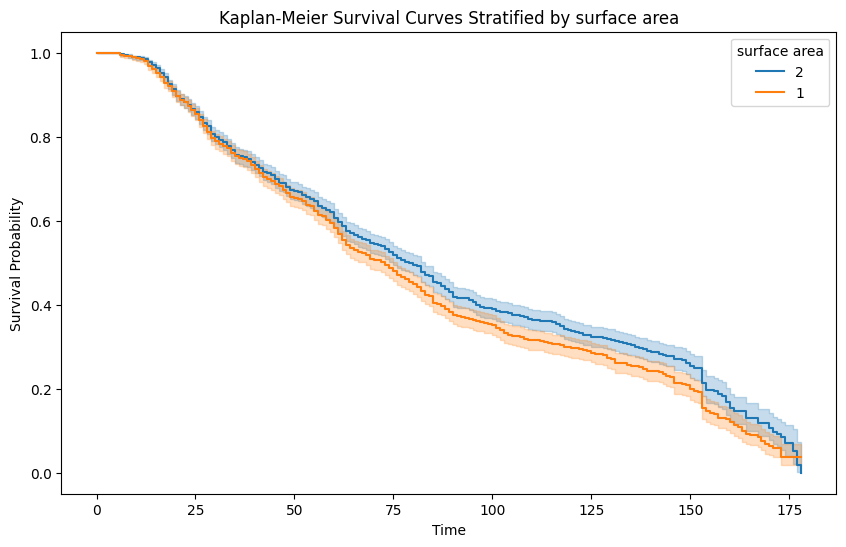

In [166]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for percentile_column in df['percentile_column'].unique():
    # Select df for each property type
    idx = df['percentile_column'] == percentile_column
    kmf.fit(df[idx]['time2event'], event_observed=df[idx]['event'], label=percentile_column)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves Stratified by surface area')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='surface area')
plt.show()

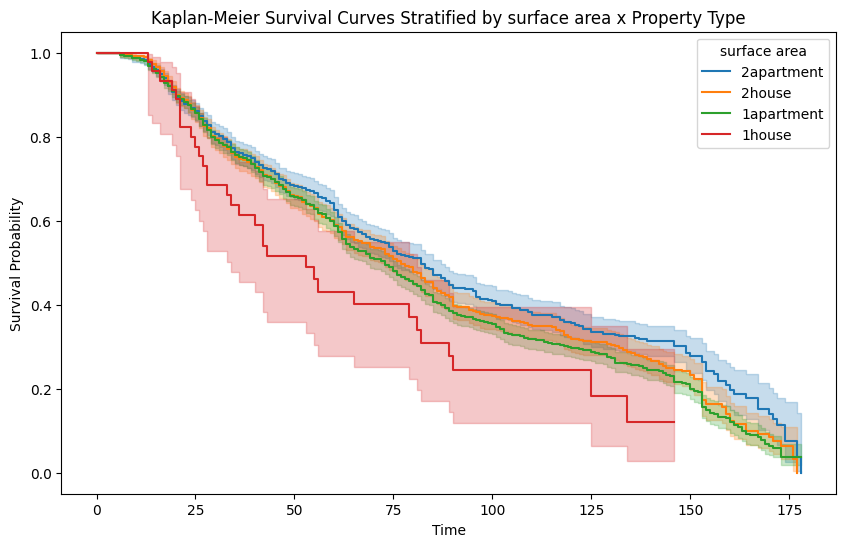

In [172]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for percentile_column in df['percentile_column'].unique():
    for typex in df['property_type'].unique():
        # Select df for each property type
        idx = (df['percentile_column'] == percentile_column) & (df['property_type'] == typex)
        kmf.fit(df[idx]['time2event'], event_observed=df[idx]['event'], label=str(percentile_column)+str(typex))
        kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves Stratified by surface area x Property Type')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='surface area')
plt.show()